In [68]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import tensorflow as tf
from tensorflow import keras
import statsmodels.api as sm #통계분석 기능을 제공하는 파이썬 패키지
import matplotlib

In [69]:
df = pd.read_excel('팀타자2019.xlsx')
teamlist=['NC','OB','WO','HT','LG','SS','KT','LT','SK','HH']
df['GDAY_DS']=pd.to_datetime(df['GDAY_DS'], format='%Y%m%d')
df= df.set_index('GDAY_DS')

In [70]:
#cols = ['G_ID','VS_T_ID','HEADER_NO','TB_SC','PA','RBI','RUN','H2','H3','HR','SB','CS','SH','SF','BB','IB','HP','KK','GD','ERR','LOB','P_HRA_RT','P_AB_CN','P_HIT_CN']
#df.drop(cols, axis=1, inplace=True)

In [71]:
def col_name_kr(df):
    df.rename(columns={'G_ID':'게임키'}, inplace =True)
    df.rename(columns={'GDAY_DS':'일자'}, inplace =True)
    df.rename(columns={'VS_T_ID':'상대팀코드'}, inplace =True)
    df.rename(columns={'HEADER_NO':'더블헤더코드'}, inplace =True)
    df.rename(columns={'TB_SC' :'초말'}, inplace =True)
    df.rename(columns={'PA':'타자'}, inplace =True)
    df.rename(columns={'AB':'타수'}, inplace =True)
    df.rename(columns={'RBI':'타점'}, inplace =True)
    df.rename(columns={'RUN':'득점'}, inplace =True)
    df.rename(columns={'HIT':'안타'}, inplace =True)
    df.rename(columns={'H2':'2루타'}, inplace =True)
    df.rename(columns={'H3':'3루타'}, inplace =True)
    df.rename(columns={'HR':'홈런'}, inplace =True)
    df.rename(columns={'SB':'도루'}, inplace =True)
    df.rename(columns={'CS':'도루실패'}, inplace =True)
    df.rename(columns={'SH' :'희생타'}, inplace =True)
    df.rename(columns={'SF':'희생플라이'}, inplace =True)
    df.rename(columns={'BB':'4구'}, inplace =True)
    df.rename(columns={'IB':'고4'}, inplace =True)
    df.rename(columns={'HP':'사구'}, inplace =True)
    df.rename(columns={'KK':'삼진'}, inplace =True)
    df.rename(columns={'GD':'병살타'}, inplace =True)
    df.rename(columns={'ERR':'실책'}, inplace =True)
    df.rename(columns={'LOB':'잔루'}, inplace =True)
    df.rename(columns={'P_HRA_RT':'득점권타율'}, inplace =True)
    df.rename(columns={'P_AB_CN':'득점권타수'}, inplace =True)
    df.rename(columns={'P_HIT_CN' :'득점권안타'}, inplace =True)

In [72]:
col_name_kr(df)

In [73]:
def avg(df):
    df['타율'] = df['안타']/df['타수']
    df['득점권타율'] = df['득점권안타']/df['득점권타수']

In [74]:
avg(df)
df

,게임키,T_ID,상대팀코드,더블헤더코드,초말,타자,타수,타점,득점,안타,...,고4,사구,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율
GDAY_DS,,,,,,,,,,,,,,,,,,,,,
2019-03-23,20190323HHOB0,HH,OB,0,T,42,34,4,4,12,...,0,1,7,2,1,11,0.200000,10,2,0.352941
2019-03-23,20190323LGHT0,HT,LG,0,B,33,28,0,0,3,...,0,1,6,1,0,6,0.000000,9,0,0.107143
2019-03-23,20190323KTSK0,KT,SK,0,T,39,36,4,4,9,...,0,0,10,1,1,8,0.200000,10,2,0.250000
2019-03-23,20190323LGHT0,LG,HT,0,T,34,31,2,2,8,...,0,0,12,3,0,5,0.142857,7,1,0.258065
2019-03-23,20190323WOLT0,LT,WO,0,B,37,35,4,4,7,...,0,1,11,0,2,6,0.230769,13,3,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,20190930SKHH0,SK,HH,0,T,41,33,6,6,9,...,1,0,9,1,1,8,0.400000,10,4,0.272727
2019-10-01,20191001WOLT0,LT,WO,0,B,37,36,1,1,9,...,0,0,8,0,2,9,0.166667,6,1,0.250000
2019-10-01,20191001NCOB0,NC,OB,0,T,45,43,4,5,17,...,0,0,7,1,1,13,0.250000,16,4,0.395349


In [75]:
for name in teamlist:
    globals()['TH{}'.format(name)] =df[ df['T_ID']==name]

In [76]:
THNC

,게임키,T_ID,상대팀코드,더블헤더코드,초말,타자,타수,타점,득점,안타,...,고4,사구,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율
GDAY_DS,,,,,,,,,,,,,,,,,,,,,
2019-03-23,20190323SSNC0,NC,SS,0,B,36,31,7,7,8,...,0,0,7,0,2,5,0.250000,4,1,0.258065
2019-03-24,20190324SSNC0,NC,SS,0,B,38,37,3,3,8,...,0,1,5,0,2,8,0.125000,8,1,0.216216
2019-03-26,20190326KTNC0,NC,KT,0,B,51,43,9,9,12,...,2,1,10,2,2,10,0.272727,11,3,0.279070
2019-03-27,20190327KTNC0,NC,KT,0,B,29,28,4,4,6,...,0,0,7,1,1,1,0.000000,3,0,0.214286
2019-03-28,20190328KTNC0,NC,KT,0,B,35,32,6,6,9,...,0,1,5,1,0,5,0.375000,8,3,0.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,20190925HHNC0,NC,HH,0,B,40,36,1,2,9,...,0,0,7,0,1,11,0.000000,13,0,0.250000
2019-09-26,20190926HHNC0,NC,HH,0,B,42,38,2,2,13,...,0,2,4,3,1,13,0.166667,12,2,0.342105
2019-09-27,20190927NCLG0,NC,LG,0,T,41,32,3,3,8,...,0,3,11,0,0,11,0.250000,12,3,0.250000


In [77]:
THNC.iloc[0,9]/THNC.iloc[0,6]

0.25806451612903225

In [78]:
for name in teamlist:
    globals()['AVG{}'.format(name)] =pd.DataFrame({"day": [None]*19, "타율": [None]*19})

In [79]:
y=THNC.resample('1W').sum()

In [80]:
ts=0;hit=0;c=0;
for name in teamlist:
    ts=0;hit=0;c=0;
    globals()['AVG{}'.format(name)].iloc[c][1]=globals()['TH{}'.format(name)].iloc[i,27]
#     for i in range(0,114):
#         ts+=globals()['TH{}'.format(name)].iloc[i,6]
#         hit+=globals()['TH{}'.format(name)].iloc[i,9]
#         if i%6==5:
#             globals()['AVG{}'.format(name)].iloc[c][1]=(hit/ts)
#             globals()['AVG{}'.format(name)].iloc[c][0]=globals()['TH{}'.format(name)].index[i]
#             ts=0
#             hit=0
#             c+=1

AVGNC

,day,타율
0,None,0.275862
1,None,None
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None


In [63]:
# from openpyxl import Workbook
# wb = Workbook()

# sheet1 = wb.active
# file_name = '분기별팀타율2019.xlsx'
# sheet1.title = 'sampleSheet'
# for rowi in range(len(teamlist)):
#     sheet1.cell(row=rowi+1,column=1).value=teamlist[rowi]
#     for col in range(0,19):
#         sheet1.cell(row=rowi+1,column=col+2).value=globals()['AVG{}'.format(teamlist[rowi])][col]
# wb.save(filename=file_name)
# AVGLT

In [64]:
for name in teamlist:
     globals()['AVG{}'.format(name)]=globals()['AVG{}'.format(name)].set_index('day')
        

In [65]:
AVGNC.index

DatetimeIndex(['2019-03-29', '2019-04-05', '2019-04-13', '2019-04-20',
               '2019-04-30', '2019-05-07', '2019-05-14', '2019-05-22',
               '2019-05-29', '2019-06-05', '2019-06-12', '2019-06-19',
               '2019-06-27', '2019-07-05', '2019-07-13', '2019-07-27',
               '2019-08-04', '2019-08-13', '2019-08-20'],
              dtype='datetime64[ns]', name='day', freq=None)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0, flags=flags)


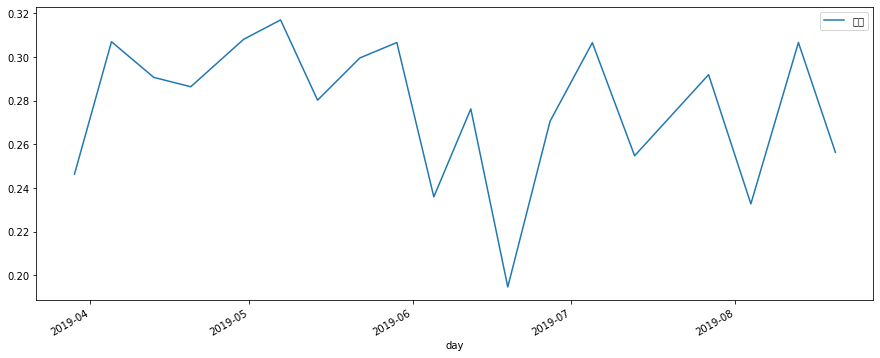

In [66]:
AVGNC.plot(figsize = (15,6))
plt.show()

In [19]:
decomposition = sm.tsa.seasonal_decompose(AVGNC, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue